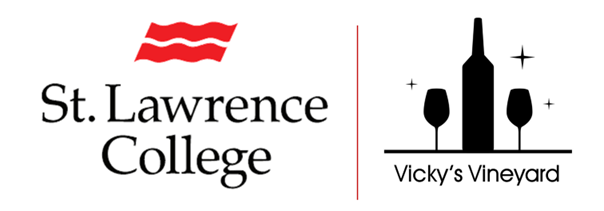
## ADMN5015: Artificial Intelligence in Marketing
### Classification Project
Maria Isabel Dio Grau

<i>This Python notebook contains a combination of markdown text and code block comments that explain the tasks being executed.</i><br>
***
This program aims to perform the following tasks (each line is linked to the code block that executes the corresponding step):
1. <a href='#extract'>Extract datasets from GitHub</a>
2. <a href='#process'>Process data</a>
3. <a href='#classification'>Develop a classification model using Tensorflow, with quality as the output variable</a>
4. <a href='#predict'>Predict the quality score of three samples</a>

### Data description
<b>Vicky's Vineyard</b> is a winery that recently opened in Kingston, Ontario. Vicky, the wine connoisseur, wants to ensure that the products she serves are of high quality to attract customers. She gathered data on several physiochemical factors of wine samples to evaluate their quality.

This dataset consists of 1,140 samples that evaluate wine quality based on the following factors:
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

The output, quality, is a score between 0 and 10*. <br><br>

<i>*Although quality is numerical in nature, it can only take on a limited set of values, which makes this a classification problem. Further, although the dataset describes quality as a score between 0 and 10, the actual data only contains 6 scores (i.e., 6 clases), from 3 to 8.<br><br>
This dataset contains real data, but "Vicky's Vineyard" is a hypothetical company.</i>

### Marketing business case
Vicky plans to incorporate this model in her wine production processs. Among other things, this will help her in pricing her products - those of higher quality will be priced at a premium compared to those of average quality. The model can also help her determine which combination of the factors listed above can provide the best wine, which will strengthen her brand image.

***
Before running the program, packages must first be imported in order to access the various functions used by the codes below. If necessary, the packages must first be installed with `pip install [package name]`

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

<a id='extract'></a>
### Extract datasets from GitHub

Two datasets will be extracted from GitHub. The first dataset will be divided into training data and test data. The second dataset contains three wine samples with unknown quality scores. The trained model will be used to predict the quality of these three samples.

In [3]:
# Download dataset

df = pd.read_csv("https://raw.githubusercontent.com/isabelgrau/ADMN5015-AI-in-Marketing/main/Classification/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_predict = pd.read_csv("https://raw.githubusercontent.com/isabelgrau/ADMN5015-AI-in-Marketing/main/Classification/winequality_predict.csv")
df_predict

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.6,1.58,0.00,2.1,0.137,5,9,0.99476,3.50,0.40,10.9
1,7.4,0.66,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4
2,12.8,0.30,0.74,2.6,0.095,9,28,0.99940,3.20,0.77,10.8


<a id='process'></a>
### Process data

In [5]:
# Make sure data types are correct (no objects)

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Although quality is a score between 0 and 10 (i.e., 11 classes), the dataset contains only 6 scores. For modelling purposes, I will be recoding the ```quality``` column such that the lowest value is class 0 (i.e., ```df['quality'] - 3```). When making predictions, the classes will be adjusted upwards by 3 to reflect the predicted scores.

In [7]:
df['quality'] = df['quality'] - 3
df['quality'].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [9]:
# Create traning and testing datasets

numeric_features = df.drop(['quality'], axis = 1)
target = df['quality']

train_numeric_features, test_numeric_features, train_target, test_target = train_test_split(
    numeric_features, target, test_size=0.3, random_state=0)

In [10]:
train_numeric_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
665,10.2,0.440,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0
901,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5
131,6.7,0.620,0.21,1.9,0.079,8.0,62.0,0.99700,3.52,0.58,9.3
252,12.6,0.380,0.66,2.6,0.088,10.0,41.0,1.00100,3.17,0.68,9.8
330,13.0,0.320,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6


<a id='classification'></a>
### Classification model

In [11]:
# Convert data to Tensorflow tensor

train_numeric_features = tf.convert_to_tensor(train_numeric_features)
train_numeric_features

<tf.Tensor: shape=(798, 11), dtype=float64, numpy=
array([[10.2  ,  0.44 ,  0.58 , ...,  3.29 ,  0.99 , 12.   ],
       [ 8.   ,  0.715,  0.22 , ...,  3.24 ,  0.54 ,  9.5  ],
       [ 6.7  ,  0.62 ,  0.21 , ...,  3.52 ,  0.58 ,  9.3  ],
       ...,
       [ 6.7  ,  0.64 ,  0.23 , ...,  3.36 ,  0.7  , 10.9  ],
       [ 6.5  ,  0.46 ,  0.14 , ...,  3.66 ,  0.65 ,  9.8  ],
       [ 8.4  ,  0.59 ,  0.29 , ...,  3.15 ,  0.5  ,  9.1  ]])>

In [12]:
# Normalize data

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_numeric_features)

In [13]:
# Define model

def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6) # Adjusted quality scores range from 0 to 5
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [14]:
# Train model

BATCH_SIZE = 128

model = get_basic_model()
model.fit(train_numeric_features, train_target, epochs=1000, batch_size=BATCH_SIZE)

Epoch 1/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.8278 - accuracy: 0.0977
Epoch 2/1000
7/7 [==============================] - 0s 916us/step - loss: 1.7934 - accuracy: 0.1491
Epoch 3/1000
7/7 [==============================] - 0s 866us/step - loss: 1.7682 - accuracy: 0.1754
Epoch 4/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.7440 - accuracy: 0.2118
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.7202 - accuracy: 0.2581
Epoch 6/1000
7/7 [==============================] - 0s 997us/step - loss: 1.6916 - accuracy: 0.2820
Epoch 7/1000
7/7 [==============================] - 0s 831us/step - loss: 1.6588 - accuracy: 0.3246
Epoch 8/1000
7/7 [==============================] - 0s 997us/step - loss: 1.6206 - accuracy: 0.3722
Epoch 9/1000
7/7 [==============================] - 0s 975us/step - loss: 1.5748 - accuracy: 0.4110
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.5232 - accuracy: 0.4486
Epoch 1

7/7 [==============================] - 0s 883us/step - loss: 0.6976 - accuracy: 0.7218
Epoch 163/1000
7/7 [==============================] - 0s 997us/step - loss: 0.6981 - accuracy: 0.7231
Epoch 164/1000
7/7 [==============================] - 0s 765us/step - loss: 0.6972 - accuracy: 0.7243
Epoch 165/1000
7/7 [==============================] - 0s 976us/step - loss: 0.6961 - accuracy: 0.7243
Epoch 166/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.7231
Epoch 167/1000
7/7 [==============================] - 0s 997us/step - loss: 0.6917 - accuracy: 0.7256
Epoch 168/1000
7/7 [==============================] - 0s 830us/step - loss: 0.6917 - accuracy: 0.7293
Epoch 169/1000
7/7 [==============================] - 0s 997us/step - loss: 0.6889 - accuracy: 0.7256
Epoch 170/1000
7/7 [==============================] - 0s 831us/step - loss: 0.6873 - accuracy: 0.7268
Epoch 171/1000
7/7 [==============================] - 0s 997us/step - loss: 0.6860 - accuracy: 0.72

7/7 [==============================] - 0s 752us/step - loss: 0.5614 - accuracy: 0.7619
Epoch 323/1000
7/7 [==============================] - 0s 850us/step - loss: 0.5611 - accuracy: 0.7707
Epoch 324/1000
7/7 [==============================] - 0s 665us/step - loss: 0.5591 - accuracy: 0.7707
Epoch 325/1000
7/7 [==============================] - 0s 831us/step - loss: 0.5579 - accuracy: 0.7719
Epoch 326/1000
7/7 [==============================] - 0s 821us/step - loss: 0.5572 - accuracy: 0.7644
Epoch 327/1000
7/7 [==============================] - 0s 932us/step - loss: 0.5572 - accuracy: 0.7632
Epoch 328/1000
7/7 [==============================] - 0s 997us/step - loss: 0.5571 - accuracy: 0.7682
Epoch 329/1000
7/7 [==============================] - 0s 831us/step - loss: 0.5547 - accuracy: 0.7744
Epoch 330/1000
7/7 [==============================] - 0s 996us/step - loss: 0.5556 - accuracy: 0.7682
Epoch 331/1000
7/7 [==============================] - 0s 997us/step - loss: 0.5543 - accuracy: 0.

7/7 [==============================] - 0s 831us/step - loss: 0.4697 - accuracy: 0.8346
Epoch 483/1000
7/7 [==============================] - 0s 895us/step - loss: 0.4711 - accuracy: 0.8333
Epoch 484/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.8283
Epoch 485/1000
7/7 [==============================] - 0s 831us/step - loss: 0.4745 - accuracy: 0.8246
Epoch 486/1000
7/7 [==============================] - 0s 998us/step - loss: 0.4683 - accuracy: 0.8271
Epoch 487/1000
7/7 [==============================] - 0s 819us/step - loss: 0.4661 - accuracy: 0.8308
Epoch 488/1000
7/7 [==============================] - 0s 831us/step - loss: 0.4665 - accuracy: 0.8371
Epoch 489/1000
7/7 [==============================] - 0s 852us/step - loss: 0.4662 - accuracy: 0.8371
Epoch 490/1000
7/7 [==============================] - 0s 831us/step - loss: 0.4645 - accuracy: 0.8346
Epoch 491/1000
7/7 [==============================] - 0s 831us/step - loss: 0.4639 - accuracy: 0.83

7/7 [==============================] - 0s 831us/step - loss: 0.3973 - accuracy: 0.8697
Epoch 643/1000
7/7 [==============================] - 0s 831us/step - loss: 0.3948 - accuracy: 0.8697
Epoch 644/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8672
Epoch 645/1000
7/7 [==============================] - 0s 798us/step - loss: 0.3945 - accuracy: 0.8659
Epoch 646/1000
7/7 [==============================] - 0s 831us/step - loss: 0.3942 - accuracy: 0.8672
Epoch 647/1000
7/7 [==============================] - 0s 831us/step - loss: 0.3931 - accuracy: 0.8709
Epoch 648/1000
7/7 [==============================] - 0s 830us/step - loss: 0.3975 - accuracy: 0.8684
Epoch 649/1000
7/7 [==============================] - 0s 826us/step - loss: 0.3916 - accuracy: 0.8684
Epoch 650/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8709
Epoch 651/1000
7/7 [==============================] - 0s 831us/step - loss: 0.3958 - accuracy: 0.8672

7/7 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8872
Epoch 803/1000
7/7 [==============================] - 0s 831us/step - loss: 0.3379 - accuracy: 0.8885
Epoch 804/1000
7/7 [==============================] - 0s 965us/step - loss: 0.3367 - accuracy: 0.8897
Epoch 805/1000
7/7 [==============================] - 0s 998us/step - loss: 0.3380 - accuracy: 0.8897
Epoch 806/1000
7/7 [==============================] - 0s 930us/step - loss: 0.3369 - accuracy: 0.8897
Epoch 807/1000
7/7 [==============================] - 0s 829us/step - loss: 0.3384 - accuracy: 0.8860
Epoch 808/1000
7/7 [==============================] - 0s 831us/step - loss: 0.3392 - accuracy: 0.8847
Epoch 809/1000
7/7 [==============================] - 0s 873us/step - loss: 0.3375 - accuracy: 0.8872
Epoch 810/1000
7/7 [==============================] - 0s 997us/step - loss: 0.3408 - accuracy: 0.8835
Epoch 811/1000
7/7 [==============================] - 0s 781us/step - loss: 0.3394 - accuracy: 0.88

7/7 [==============================] - 0s 915us/step - loss: 0.2952 - accuracy: 0.9048
Epoch 963/1000
7/7 [==============================] - 0s 877us/step - loss: 0.2952 - accuracy: 0.9010
Epoch 964/1000
7/7 [==============================] - 0s 948us/step - loss: 0.2967 - accuracy: 0.8985
Epoch 965/1000
7/7 [==============================] - 0s 753us/step - loss: 0.2956 - accuracy: 0.9060
Epoch 966/1000
7/7 [==============================] - 0s 997us/step - loss: 0.2941 - accuracy: 0.9048
Epoch 967/1000
7/7 [==============================] - 0s 831us/step - loss: 0.2941 - accuracy: 0.9035
Epoch 968/1000
7/7 [==============================] - 0s 997us/step - loss: 0.2949 - accuracy: 0.8997
Epoch 969/1000
7/7 [==============================] - 0s 831us/step - loss: 0.2939 - accuracy: 0.9035
Epoch 970/1000
7/7 [==============================] - 0s 925us/step - loss: 0.2951 - accuracy: 0.9073
Epoch 971/1000
7/7 [==============================] - 0s 831us/step - loss: 0.2973 - accuracy: 0.

In [15]:
# Test model

test_numeric_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1014,7.8,0.64,0.00,1.9,0.072,27.0,55.0,0.99620,3.31,0.63,11.0
878,7.4,0.55,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5
1070,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4
184,8.0,0.52,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0
685,7.0,0.40,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3


In [16]:
# Convert test data to Tensorflow tensor

test_numeric_features = tf.convert_to_tensor(test_numeric_features)
test_numeric_features

<tf.Tensor: shape=(342, 11), dtype=float64, numpy=
array([[ 7.8  ,  0.64 ,  0.   , ...,  3.31 ,  0.63 , 11.   ],
       [ 7.4  ,  0.55 ,  0.19 , ...,  3.49 ,  0.68 , 10.5  ],
       [ 7.5  ,  0.38 ,  0.57 , ...,  3.36 ,  0.55 , 11.4  ],
       ...,
       [ 7.4  ,  0.47 ,  0.46 , ...,  3.32 ,  0.63 , 10.5  ],
       [ 7.8  ,  0.545,  0.12 , ...,  3.34 ,  0.61 , 11.6  ],
       [12.8  ,  0.3  ,  0.74 , ...,  3.2  ,  0.77 , 10.8  ]])>

In [17]:
# Normalize data

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(test_numeric_features)

In [18]:
# Evaluate test data based on training data

score = model.evaluate(test_numeric_features, test_target, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

11/11 [==============================] - 0s 898us/step - loss: 2.6789 - accuracy: 0.5731
Test loss: 2.678856611251831 / Test accuracy: 0.5730994343757629


The trained model has an accuracy of 91%. However, when used on the test data, accuracy drops to 57%.

The high training accuracy and low test accuracy suggest overfitting. The following changes could be made to develop a model with better predictive power:
* Train a different prediction model
* Increase the sample size
* Change the features used to predict the output

Despite the low test accuracy, the analysis that follows will still use the trained model to make predictions and provide marketing insights.

<a id='predict'></a>
### Prediction

In [19]:
df_predict

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.6,1.58,0.00,2.1,0.137,5,9,0.99476,3.50,0.40,10.9
1,7.4,0.66,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4
2,12.8,0.30,0.74,2.6,0.095,9,28,0.99940,3.20,0.77,10.8


In [20]:
# Convert data to Tensorflow tensor

predict_numeric_features = tf.convert_to_tensor(df_predict)
predict_numeric_features

<tf.Tensor: shape=(3, 11), dtype=float64, numpy=
array([[ 7.6    ,  1.58   ,  0.     ,  2.1    ,  0.137  ,  5.     ,
         9.     ,  0.99476,  3.5    ,  0.4    , 10.9    ],
       [ 7.4    ,  0.66   ,  0.     ,  1.8    ,  0.075  , 13.     ,
        40.     ,  0.9978 ,  3.51   ,  0.56   ,  9.4    ],
       [12.8    ,  0.3    ,  0.74   ,  2.6    ,  0.095  ,  9.     ,
        28.     ,  0.9994 ,  3.2    ,  0.77   , 10.8    ]])>

In [21]:
# Normalize

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(predict_numeric_features)

In [22]:
# Predict labels

class_names = [3, 4, 5, 6, 7, 8]  # Prediction of class 0 = quality score of 3

predictions = model(predict_numeric_features, training=False)

# Create new columns in dataframe
df_predict['quality prediction'] = None
df_predict['certainty'] = None

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Wine sample {} quality score prediction: {} ({:4.1f}%)".format(i+1, name, 100*p))

  # Save predictions to dataframe
  df_predict['quality prediction'].iloc[i] = name
  df_predict['certainty'].iloc[i] = format(p)


Wine sample 1 quality score prediction: 5 (99.5%)
Wine sample 2 quality score prediction: 5 (92.6%)
Wine sample 3 quality score prediction: 6 (93.9%)


In [23]:
df_predict

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality prediction,certainty
0,7.6,1.58,0.00,2.1,0.137,5,9,0.99476,3.50,0.40,10.9,5,0.995305597782135
1,7.4,0.66,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5,0.925950288772583
2,12.8,0.30,0.74,2.6,0.095,9,28,0.99940,3.20,0.77,10.8,6,0.9389526844024658


The model predicts that the three wine samples have quality scores of 5, 5, and 6, respectively. All three predictions have certainty levels above 90%. However, because the test data shows that this is not a good model, the predictions may not be reliable. Further model training is needed to accurately predict wine quality.

Assuming this is a good model, Vicky's Vineyard can use these predictions to market its wine products. Wine sample 3, for instance, has the highest quality score, which suggests that it can be priced at a premium. Vicky can also evaluate the features that make wine sample 3 better than the first two wine samples. She can then make adjustments to produce even better wine products.<br><br>

<i>For reference, the actual scores of the three wine samples are 3, 5, and 7, respectively.</i>

Data source:
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?datasetId=1866301